In [1]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

df = pd.read_csv("fuzzy_students_120.csv")
df.head()


,student_id,study_hours,sleep_hours,score
0,1,6.30,6.28,56.4
1,2,3.79,6.64,41.8
2,3,6.94,4.98,53.5
3,4,5.73,5.90,53.8
4,5,1.21,5.33,22.0


In [2]:
data = df[['study_hours', 'sleep_hours', 'score']].to_numpy().T
data.shape


(3, 120)

In [3]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=data,
    c=3,
    m=2,
    error=0.005,
    maxiter=1000,
    init=None,
)

print("Cluster centers:\n", cntr)
print("FPC (partition coefficient):", fpc)


Cluster centers:
 [[ 6.38882513  6.12574006 59.81492375]
 [ 1.71137991  6.23429447 28.43983285]
 [ 3.92202113  6.22287495 44.34124663]]
FPC (partition coefficient): 0.7836349465141651


In [4]:
labels = np.argmax(u, axis=0)
df['cluster'] = labels
df.head(10)


,student_id,study_hours,sleep_hours,score,cluster
0,1,6.30,6.28,56.4,0
1,2,3.79,6.64,41.8,2
2,3,6.94,4.98,53.5,0
3,4,5.73,5.90,53.8,0
4,5,1.21,5.33,22.0,1
5,6,7.82,5.93,65.8,0
6,7,6.21,5.65,54.2,0
7,8,6.40,5.17,56.7,0
8,9,1.46,5.46,21.7,1
9,10,3.88,6.48,39.6,2


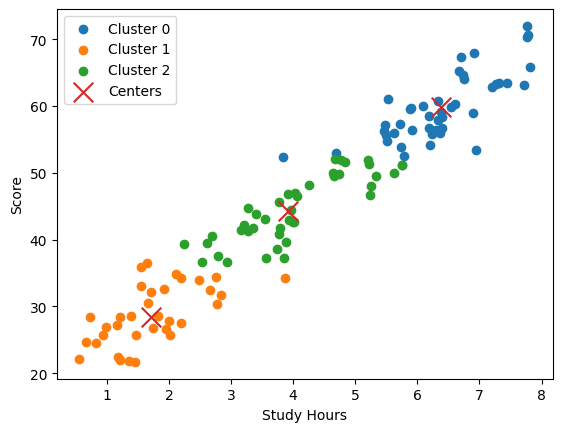

In [5]:
fig, ax = plt.subplots()

for c in range(3):
    pts = df[df['cluster'] == c]
    ax.scatter(pts['study_hours'], pts['score'], label=f"Cluster {c}")

ax.scatter(cntr[:, 0], cntr[:, 2], s=200, marker='x', label='Centers')
ax.set_xlabel("Study Hours")
ax.set_ylabel("Score")
ax.legend()
plt.show()
